In [ ]:
import tensorflow as tf

from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

In [ ]:

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',

               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


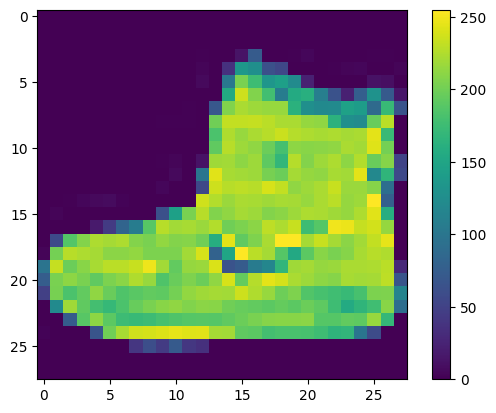

9


In [ ]:
print(train_images.shape)

print(len(train_labels))

print(train_labels)

print(test_images.shape)

print(len(test_labels))

plt.figure()

plt.imshow(train_images[0])

plt.colorbar()

plt.grid(False)

plt.show()
print(train_labels[0])

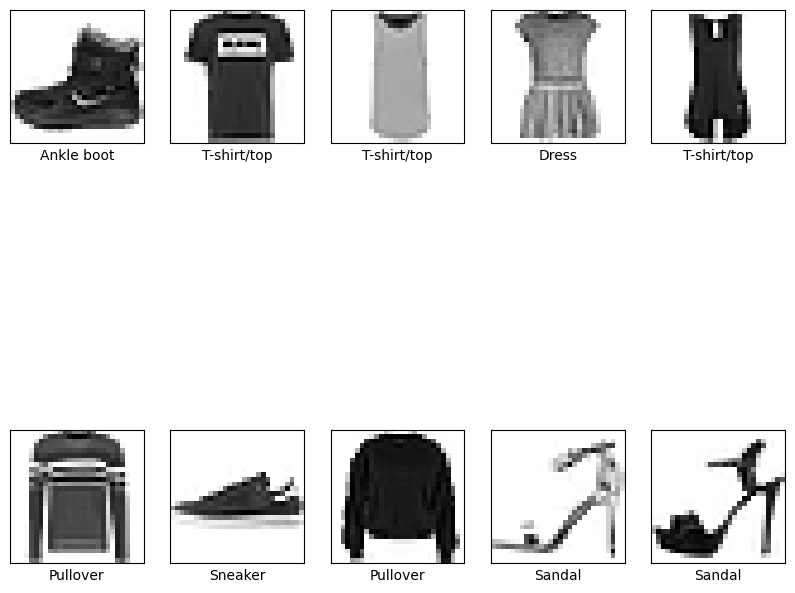

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))

for i in range(10):

    plt.subplot(2,5,i+1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)

    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu'),

    keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam',

              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7791 - loss: 0.6333
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8604 - loss: 0.3884
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8754 - loss: 0.3415
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8831 - loss: 0.3168
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8903 - loss: 0.2956
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8956 - loss: 0.2820
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8994 - loss: 0.2700
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9061 - loss: 0.2522
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9097 - loss: 0.2461
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9112 - loss: 0.2387


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8719 - loss: 0.3558

Test accuracy: 0.8719000220298767


In [ ]:
img = test_images[1]
img = img.reshape(1, 784)


In [ ]:


print("Predicting the class : ",np.argmax(model.predict()))

print("Test Label : ",test_labels[1])

plt.figure(figsize=(10,10))

Predicting the class :  0
Test Label :  2


Exception ignored in: <function _xla_gc_callback at 0x7e3bbe6afd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

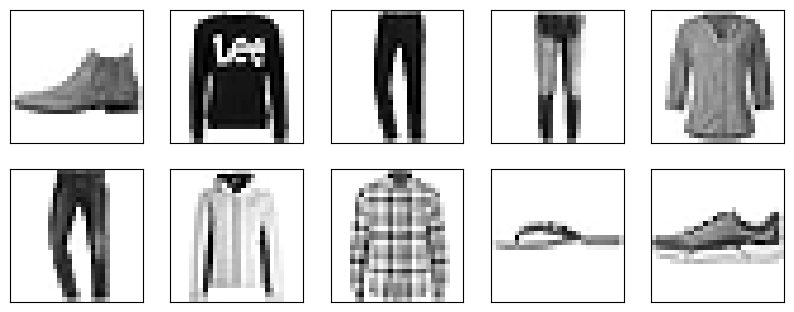

In [ ]:
plt.figure(figsize=(10,10))

for i in range(10):

    plt.subplot(5,5,i+1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)

    plt.imshow(test_images[i], cmap=plt.cm.binary)
    img = test_images[i]
    img = img.reshape(1, 784)
    #print(np.argmax(model.predict()))
    #plt.xlabel(class_names[np.argmax(model.predict())])

plt.show()